In [139]:
# importing
import numpy as np
import pandas as pd
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import wrangle

# using wrangle function to acquire prepared data
df = wrangle.wrangle_telco()

# splitting dataframe into train, validate and test sets
train_and_validate, test = train_test_split(df, test_size=.2, random_state=123)
train, validate = train_test_split(train_and_validate, test_size=.2, random_state=123)

# verifying data looks good
train.head()

,customer_id,monthly_charges,tenure,total_charges
1171,6980-IMXXE,20.20,69,1412.65
736,4573-JKNAE,19.35,12,212.30
1485,8774-GSBUN,25.40,72,1797.10
1139,6770-UAYGJ,25.25,49,1211.65
689,4139-DETXS,64.45,72,4528.00


#### Apply the scalers we talked about in this lesson to your data and visualize the results in a way that can .

[Text(0.5, 1.0, 'Monthly_Charges_Scaled')]

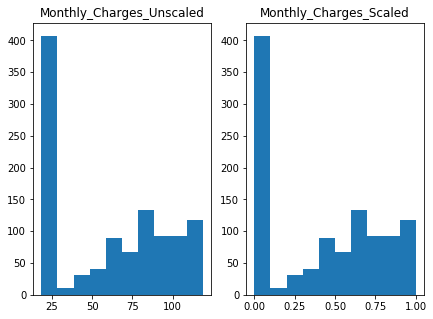

In [122]:
# creating scaler object
scaler = sklearn.preprocessing.MinMaxScaler()

# fitting and transforming monthly_charges with scaler
monthly_charges_scaled = scaler.fit_transform(train[['monthly_charges']])

# specifying figure size 
fig = plt.figure(figsize=(7,5))

# specifying subplot dimension
# 1 row, 2 columns
gs = plt.GridSpec(1, 2)

# plots will be in same row, ax1 on left, ax2 on right
ax1 = fig.add_subplot(gs[0, 0]) 
ax2 = fig.add_subplot(gs[0, 1])

# plotting unscaled monthly charges
ax1.hist(train.monthly_charges)
ax1.set(title='Monthly_Charges_Unscaled')

# plotting scaled monthly charges
ax2.hist(monthly_charges_scaled)
ax2.set(title='Monthly_Charges_Scaled')

#### Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [91]:
# creating new scaler object
scaler = sklearn.preprocessing.MinMaxScaler()

# fitting scaler to monthly charges column in train
scaler.fit(train[['monthly_charges']])

# creating DF that holds scaled monthly_charges
train_scaled = scaler.transform(train[['monthly_charges']])
train_scaled = pd.DataFrame(train_scaled, columns=['monthly_charges_scaled'])

# examining results
train_scaled.head()

,monthly_charges_scaled
0,0.017955
1,0.009476
2,0.069825
3,0.068329
4,0.459352


In [108]:
# creating DF that holds original monthly charges values in first column
# and un-transformed (inverted after scaling) monthly charges values
scale_comparer = train[['monthly_charges']]
scale_comparer['inverse_transform1'] = scaler.inverse_transform(train_scaled[['monthly_charges_scaled']])

# confirming how many rows are in new DF
scale_comparer.shape

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


(1084, 2)

In [112]:
# comparing columns and confirming how many rows contain matching values
# ie. how many times did the inverted value transform back to the exact original value in train
matches = (data_scales.monthly_charges == data_scales.inverse_transform1).sum()

print(f'The inverter was able to return {matches} values back to the identical value they began as in the train dataset.')

The inverter was able to return 830 values back to the identical value they began as in the train dataset.


#### Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data.

In [119]:
# create quantile transformer object
qscaler = sklearn.preprocessing.QuantileTransformer(output_distribution = 'normal')

# fit quantile transformer to columns
qscaler.fit(train[['monthly_charges', 'tenure', 'total_charges']])

# transform values with fitted transformer
qtrain = qscaler.transform(train[['monthly_charges', 'tenure', 'total_charges']])

# create new DF using transformed values
qscaled_df = pd.DataFrame(qtrain)

# rename columns
qscaled_df.columns = ['monthly_charges_qscaled','tenure_qscaled','total_charges_qscaled']
qscaled_df.head()

,monthly_charges_qscaled,tenure_qscaled,total_charges_qscaled
0,-0.920412,0.378977,-0.496922
1,-1.880352,-1.761948,-1.929210
2,-0.406079,5.199338,-0.265669
3,-0.436240,-0.627196,-0.696636
4,0.001255,5.199338,0.215631


#### Visualize the result of your data scaling.

[Text(0.5, 1.0, 'Total_Charges_Qscaled')]

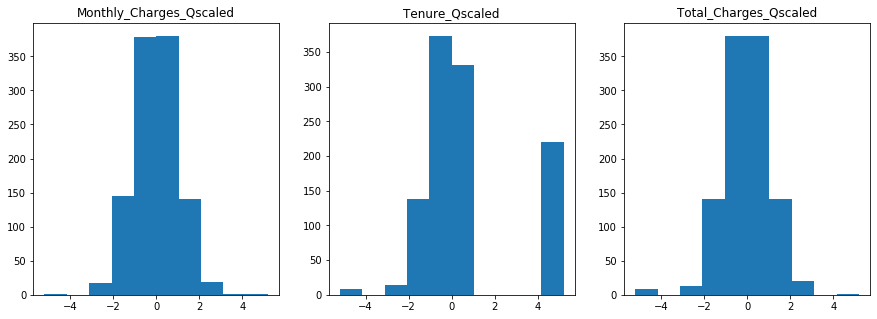

In [132]:
# specifying figure size 
fig = plt.figure(figsize=(15,5))

# specifying subplot dimension
# 1 row, 3 columns
gs = plt.GridSpec(1, 3)

# plots will be in same row, different columns
ax1 = fig.add_subplot(gs[0, 0]) 
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])

# plotting histograms using qscaled data
ax1.hist(qscaled_df.monthly_charges_qscaled)
ax1.set(title='Monthly_Charges_Qscaled')

ax2.hist(qscaled_df.tenure_qscaled)
ax2.set(title='Tenure_Qscaled')

ax3.hist(qscaled_df.total_charges_qscaled)
ax3.set(title='Total_Charges_Qscaled')

#### Use the QuantileTransformer, but omit the output_distribution argument.

In [133]:
# create quantile transformer object
qscaler = sklearn.preprocessing.QuantileTransformer()

# fit quantile transformer to columns
qscaler.fit(train[['monthly_charges', 'tenure', 'total_charges']])

# transform values with fitted transformer
qtrain = qscaler.transform(train[['monthly_charges', 'tenure', 'total_charges']])

# create new DF using transformed values
qscaled_df = pd.DataFrame(qtrain)

# rename columns
qscaled_df.columns = ['monthly_charges_qscaled','tenure_qscaled','total_charges_qscaled']
qscaled_df.head()

,monthly_charges_qscaled,tenure_qscaled,total_charges_qscaled
0,0.178679,0.647648,0.309622
1,0.030030,0.039039,0.026852
2,0.342342,1.000000,0.395247
3,0.331331,0.265265,0.243015
4,0.500501,1.000000,0.585362


#### Visualize the result of your data scaling.

[Text(0.5, 1.0, 'Total_Charges_Qscaled')]

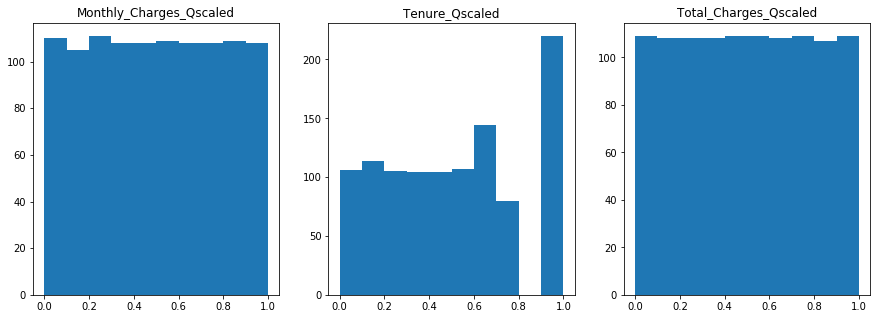

In [135]:
# specifying figure size 
fig = plt.figure(figsize=(15,5))

# specifying subplot dimension
# 1 row, 3 columns
gs = plt.GridSpec(1, 3)

# plots will be in same row, different columns
ax1 = fig.add_subplot(gs[0, 0]) 
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])

# plotting histograms using qscaled data
ax1.hist(qscaled_df.monthly_charges_qscaled)
ax1.set(title='Monthly_Charges_Qscaled')

ax2.hist(qscaled_df.tenure_qscaled)
ax2.set(title='Tenure_Qscaled')

ax3.hist(qscaled_df.total_charges_qscaled)
ax3.set(title='Total_Charges_Qscaled')

#### What do you notice?

In [136]:
print('The data is not scaled properly. THe distributions look completely wrong.')

The data is not scaled properly. THe distributions look completely wrong.


#### Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [147]:
# Using function from exercise guide, also adding to wrangle file
from sklearn.preprocessing import MinMaxScaler

# creating function with 3 parameters, one for each dataset (train, validate, test)
def minmax_scaler(train, validate, test):
    '''
    Function takes in train, validate and test data frames then returns them after scaling them from 0 to 1 
    '''
    # creating minmax scaler object
    scaler = MinMaxScaler()
    
    # fitting scaler to each column in the train data set
    # transforming data in train data set
    train[['monthly_charges', 'tenure' ,'total_charges']] = scaler.fit_transform(train[['monthly_charges', 'tenure', 'total_charges']])
    # transforming data in validate and test data sets while scaler fitted to train values
    validate[['monthly_charges', 'tenure', 'total_charges']] = scaler.transform(validate[['monthly_charges', 'tenure', 'total_charges']])
    test[['monthly_charges', 'tenure', 'total_charges']] = scaler.transform(test[['monthly_charges', 'tenure', 'total_charges']])
    # returning scaled data sets
    return train, validate, test


In [148]:
# testing function
minmax_scaler(train, validate, test)


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

(     customer_id  monthly_charges    tenure  total_charges
 1171  6980-IMXXE         0.017955  0.958333       0.162934
 736   4573-JKNAE         0.009476  0.166667       0.024486
 1485  8774-GSBUN         0.069825  1.000000       0.207276
 1139  6770-UAYGJ         0.068329  0.680556       0.139750
 689   4139-DETXS         0.459352  1.000000       0.522255
 ...          ...              ...       ...            ...
 441   2664-XJZNO         0.862843  1.000000       0.871910
 98    0567-XRHCU         0.254863  0.958333       0.341415
 886   5334-AFQJB         0.066833  1.000000       0.206445
 322   2001-MCUUW         0.900249  0.638889       0.565530
 1593  9418-RUKPH         0.015461  0.527778       0.087242
 
 [1084 rows x 4 columns],
      customer_id  monthly_charges    tenure  total_charges
 132   0780-XNZFN         0.022444  0.791667       0.129825
 1616  9548-LIGTA         0.624938  0.847222       0.547589
 1203  7139-JZFVG         0.419950  0.833333       0.426114
 367   2229-